<a href="https://colab.research.google.com/github/AlCobzaru/Lorenz-Equations/blob/main/System_for_r_%3D1%2C_initial_values_(_15%2C_15%2C_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install diffrax

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.4/140.4 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 KB 4.1 MB/s eta 0:00:00


In [ ]:
import time
from diffrax import diffeqsolve, ODETerm, Kvaerno5, SaveAt, PIDController
import equinox as eqx
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
jax.config.update("jax_enable_x64", True)

In [ ]:
class Lorenz(eqx.Module):
    s: float
    b: float
    r: float

    def __call__(self, t, y, args):
        f0 = self.s * (y[1] - y[0])
        f1 = self.r * y[0] - y[1] - y[0] * y[2]
        f2 = y[0] * y[1] - self.b * y[2]
        return jnp.stack([f0, f1, f2])

In [ ]:
t0 = 0.0
t1 = 50.0
y0 = jnp.array([3.0, 2.0, 3.0])

In [ ]:
@jax.jit
def main(s, b, r):
    lorenz = Lorenz(s, b, r)
    terms = ODETerm(lorenz)
    dt0 = 0.000001
    solver = Kvaerno5()
    saveat = SaveAt(ts=jnp.linspace(t0, t1, 100000))
    stepsize_controller = PIDController(rtol=1e-8, atol=1e-8)
    sol = diffeqsolve(
        terms,
        solver,
        t0,
        t1,
        dt0,
        y0,
        max_steps=100000,
        saveat=saveat,
        stepsize_controller=stepsize_controller,
    )
    return sol

Do and time one iteration to JIT compile everything. Then time the second iteration.

In [ ]:
comp_start = time.time()
main(10.0, 8.0/3.0, 0.5)
comp_end = time.time()

start = time.time()
sol = main(10.0, 8.0/3.0, 0.5)
end = time.time()

print(f"Compiling and solving took {comp_end - comp_start} seconds.")
print(f"Solving while compiled took {sol.stats['num_steps']} steps in {end - start} seconds.")

Compiling and solving took 18.407757997512817 seconds.
Solving while compiled took 90 steps in 4.2925989627838135 seconds.


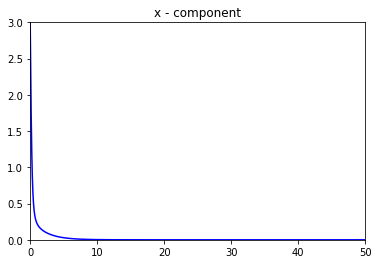

In [ ]:
figx = plt.figure()
axi = figx.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])))
plt.plot(sol.ts, sol.ys[:, 0], 'b')
plt.title('x - component')
plt.show()

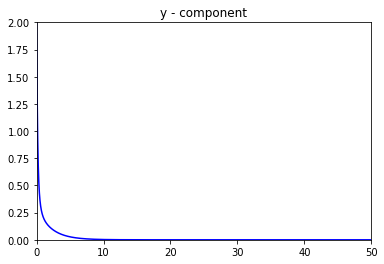

In [ ]:
figy = plt.figure()
axi = figy.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 1]), jnp.max(sol.ys[:, 1])))
plt.plot(sol.ts, sol.ys[:, 1], 'b')
plt.title('y - component')
plt.show()

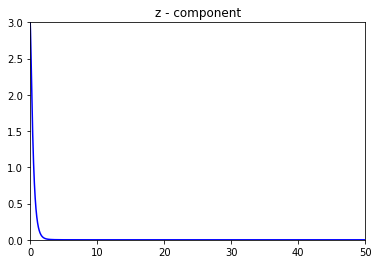

In [ ]:
figz = plt.figure()
axi = figz.add_subplot(111, xlim=(0, t1), 
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ts, sol.ys[:, 2], 'b')
plt.title('z - component')
plt.show()

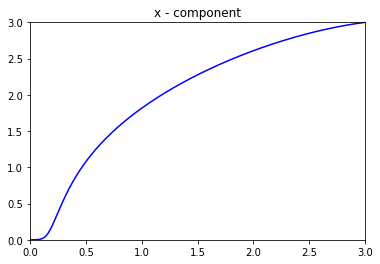

In [ ]:
figxz = plt.figure()
axi = figxz.add_subplot(111,
                xlim=(jnp.min(sol.ys[:, 0]), jnp.max(sol.ys[:,0])),
                ylim=(jnp.min(sol.ys[:, 2]), jnp.max(sol.ys[:,2])))
plt.plot(sol.ys[:, 0], sol.ys[:, 2], 'b')
plt.title('x - component')
plt.show()

Because the value of r was set to 0.5, which is smaller than 1, the system was rapidly attracted to the origin. The initial values were of x(0) = 3, y(0) = 2, z(0) = 3, and the three plots of the functions as a function of t quickly converge toward 0. The plot of z(t) as a function of x(t) shows that the system is attracted to the origin.